<a href="https://colab.research.google.com/github/CamiloE/Proyectos-Personales/blob/master/Precios_de_las_casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Por medio de este dataset se va a crear un modelo en el que se logre predecir el precio de unas casas a partir de datos  tomados como el suburbio, la dirección, el número de habitaciones, de baños, el codigo postal, tamaño del terreno, area construida, la region, entre otras

In [ ]:
#Importar librerias importantes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Importar base de datos
dataframe =  pd.read_csv("https://raw.githubusercontent.com/StephanieStallworth/Exploratory_Data_Analysis_Visualization_Python/master/Melbourne_housing_extra_data.csv")
dataframe.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067,2.0,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067,3.0,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019


In [ ]:
dataframe.drop(columns=['Postcode'],inplace=True)
dataframe.shape

(17407, 20)

Se puede ver que en el dataset hay 21 caracteristicas y 17407 muestras. \
Lo que hay que hacer es ver que tipo de dato es cada característica.

In [ ]:
dataframe.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount      int64
dtype: object

Se puede ver qu existen 8 características categoricas y el resto son numéricas. 
Las caracteristicas son las siguientes:
- Suburb: Suburbio o Barrio donde esta la casa
- Address: Dirección 
- Rooms: El numero de habitaciones
- Type: El tipo de vivienda donde 'h' corresponde a casas, cabañas, 'u' es casas tipounit y 't' se refiere a viviendas adosadas.
- SellerG: Agencia de Ventas
- Date: fecha de la venta
- Distance: Distancia en km desde la casa hasta el centro de Melbourne
- Regionname: Region donde se encuentra ubicada.
- Propertycount: Numero de propiedades en el suburbio
- Bedroom 2: Caracteristica relacionada al numero de habitaciones. 
- Bathroom: El numero de baños 
- Car: Numero de espacios para estacionar el carro
- Landsize: Corresponde al area de la propiedad en metros que no esta construida 
- Building Area: Area Construida en metros 
- Price: Precio en dolares australianos
- YearBuilt: Año en que se construyo la casa
- CouncilArea: Consejo de gobierno de la zona
- Method: Metodo con el que se adquirio la casa. 
S - propiedad vendida;
SP - propiedad vendida anteriormente;
PI: propiedad transferida;
PN - vendido antes no revelado;
SN - vendido no revelado;
NB: sin oferta;
VB: oferta del proveedor;
W - retirado antes de la subasta;
SA - vendido después de la subasta;
SS - vendido después del precio de la subasta no revelado.
N / A: el precio o la oferta más alta no están disponibles.
- Lattitude: Latitud
- Longtittude: Longitud

Lo siguente es mirar si se encuentran valores nulos en las columnas

In [ ]:
dataframe.isnull().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price             True
Method           False
SellerG          False
Date             False
Distance         False
Bedroom2          True
Bathroom          True
Car               True
Landsize          True
BuildingArea      True
YearBuilt         True
CouncilArea       True
Lattitude         True
Longtitude        True
Regionname       False
Propertycount    False
dtype: bool

Como se sabe que hay valores nulos en algunas columnas con valores nulos, lo que sigue es mirar cuantos hay en cada columna para poder proceder con la estrategia.

In [ ]:
dataframe.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             3882
Method               0
SellerG              0
Date                 0
Distance             0
Bedroom2          3782
Bathroom          3782
Car               3782
Landsize          3804
BuildingArea     10084
YearBuilt         8978
CouncilArea       3806
Lattitude         3670
Longtitude        3670
Regionname           0
Propertycount        0
dtype: int64

Se puede ver que hay varias columnas con valores nulos, se destaca que en la columna del area construida mas de la mitad de los datos son nulos pero como esta caracteristica influye entonces no se puede eliminar la columna. Entonces lo mejor es eliminarle las filas con valores nulos.

In [ ]:
dataframe.dropna(axis='index',subset=['BuildingArea'],inplace=True)
dataframe.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price            1711
Method              0
SellerG             0
Date                0
Distance            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt         277
CouncilArea         0
Lattitude           5
Longtitude          5
Regionname          0
Propertycount       0
dtype: int64

In [ ]:
dataframe.shape#Cantidad de datos y caracteristicas despues de  eliminar las muestras con valores nulos de la columna del areaconstruida

(7323, 20)

Como aaun hay valores nulos en el precio, en el año de construccion, la latitud y la longitud se requiere una descripcion de cada una de estas para la estrategia del llenado.

In [ ]:
dataframe['Price'].describe()

count    5.612000e+03
mean     1.093588e+06
std      6.851331e+05
min      1.310000e+05
25%      6.387500e+05
50%      9.000000e+05
75%      1.350000e+06
max      8.000000e+06
Name: Price, dtype: float64

In [ ]:
dataframe['Price'].value_counts()

600000.0     55
1100000.0    47
1300000.0    42
650000.0     41
500000.0     36
             ..
319000.0      1
2345000.0     1
887500.0      1
1451000.0     1
2376000.0     1
Name: Price, Length: 1494, dtype: int64

Con la serie de arriba se puede ver cual es el valor mas repetido

In [ ]:
len(dataframe[dataframe['Price']==dataframe['Price'].median()])#Numero de veces que aparece la mediana de los datos

33

In [ ]:
len(dataframe[dataframe['Price']==dataframe['Price'].mean()])

0

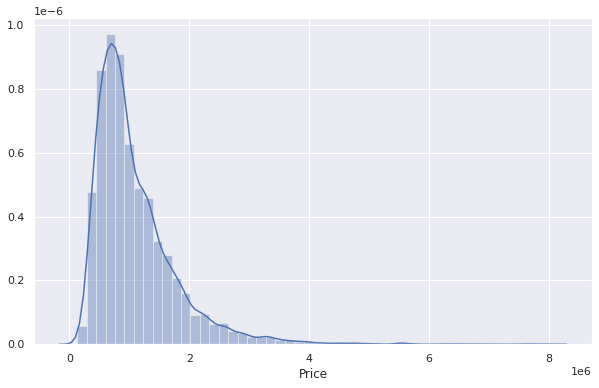

In [ ]:
fig, ax=plt.subplots(figsize=(10,6))
sns.distplot(dataframe['Price'],color='b',ax=ax)

Teniendo en cuenta la distribcion de la grafica de arriba y que el valor de la media de la columna no aparece en ningun dato, con el fin de conservar la distrbucion mostrada los valores nulos se llenaran con el precio mas repetido.

In [ ]:
dataframe['Price']=dataframe['Price'].fillna(value=600000)

In [ ]:
dataframe.isna().sum()

Suburb             0
Address            0
Rooms              0
Type               0
Price              0
Method             0
SellerG            0
Date               0
Distance           0
Bedroom2           0
Bathroom           0
Car                0
Landsize           0
BuildingArea       0
YearBuilt        277
CouncilArea        0
Lattitude          5
Longtitude         5
Regionname         0
Propertycount      0
dtype: int64

Ahora hay que realizar esa misma inspeccion a la variable del año de la construcción

In [ ]:
dataframe['YearBuilt'].value_counts()

1970.0    648
1960.0    578
1950.0    536
1900.0    344
1930.0    298
         ... 
1919.0      1
1933.0      1
1981.0      1
1884.0      1
1872.0      1
Name: YearBuilt, Length: 143, dtype: int64

In [ ]:
dataframe['YearBuilt'].describe()

count    7046.000000
mean     1961.034772
std        39.256610
min      1196.000000
25%      1930.000000
50%      1965.000000
75%      1999.000000
max      2106.000000
Name: YearBuilt, dtype: float64

De la descripcion se puede ver que hay años de construcción demasiados descabellados,lo mejor es eliminar estas muestras.

In [ ]:
dataframe[dataframe['YearBuilt']<1700]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
16424,Mount Waverley,5 Armstrong St,3,h,1200000.0,VB,McGrath,24/06/2017,14.2,3.0,1.0,4.0,807.0,117.0,1196.0,Monash,-37.86788,145.12121,Eastern Metropolitan,13366


In [ ]:
dataframe[dataframe['YearBuilt']>2018]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2453,Bulleen,3 Maringa St,4,h,600000.0,SP,Ray,7/11/2016,11.8,4.0,2.0,2.0,729.0,255.0,2106.0,Manningham,-37.7637,145.0881,Eastern Metropolitan,4480


In [ ]:
dataframe.drop(labels=[2453,16424],axis=0,inplace=True)

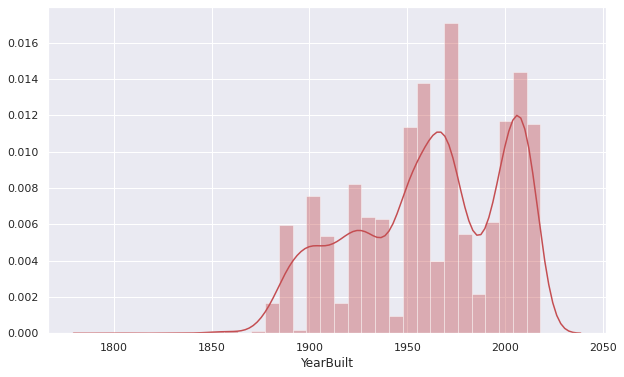

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(dataframe['YearBuilt'],color='r')

Como hay mas casas consruidas en el año 1970 que valores nulos, se les asignara este valor, el mas frecuente al igual que con las columnas de latitud y longitud.

## **Seleccion de Caracteristicas**

Para el caso de la columna de la fecha de la venta, lo que influye en el precio es el año, por eso se va a transformar solo usando su año y eliminando el mes y dia.

In [ ]:
dataframe['Date']=pd.DatetimeIndex(dataframe['Date']).year
dataframe.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019
7,Abbotsford,16 Maugie St,4,h,600000.0,SN,Nelson,2016,2.5,3.0,2.0,2.0,400.0,220.0,2006.0,Yarra,-37.7965,144.9965,Northern Metropolitan,4019
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016,2.5,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019


Despues de haber manipulado los datos nulos, lo que sigue es seleccionar las caracteristicas, ya sea eliminando o creando una nueva a partir de las existentes.\
Con respecto a las caracteristicas de Suburb, Address, Regionname and Council Area estan relacionadas con la ubicación, entonces para evitar redundancias en esa categoria solo se usara la columna de la Region. \
Con las columnas de LandSize y BuildingArea como se refieren a tamaño se creara una columna nueva que sea la suma de estas 2 y se eliminaran las otras 2. \
La antiguedad de la casa es muy importante a la hora de dar el precio es importante y para eso se debe tener en cuenta tanto el año de construccion como el año en que se vendio, asi que se creara una columna que sea la resta  y se eliminan las otras 2. \
Como la agencia de ventas no es tan crucial a la hora de dar el precio a una casa, entonces la columna  SellerG se elimina.

In [ ]:
dataframe['Age']=dataframe['Date']-dataframe['YearBuilt']
dataframe['TotalArea']=dataframe['Landsize']+dataframe['BuildingArea']
dataframe.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,TotalArea
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019,116.0,235.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019,117.0,284.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019,2.0,262.0
7,Abbotsford,16 Maugie St,4,h,600000.0,SN,Nelson,2016,2.5,3.0,2.0,2.0,400.0,220.0,2006.0,Yarra,-37.7965,144.9965,Northern Metropolitan,4019,10.0,620.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016,2.5,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019,106.0,455.0


Como aun existen variables cualitativas y no se pueden escoger todas, por medio de las graficas de violinplot se puede conocer la relación y la influencia de estas en el precio

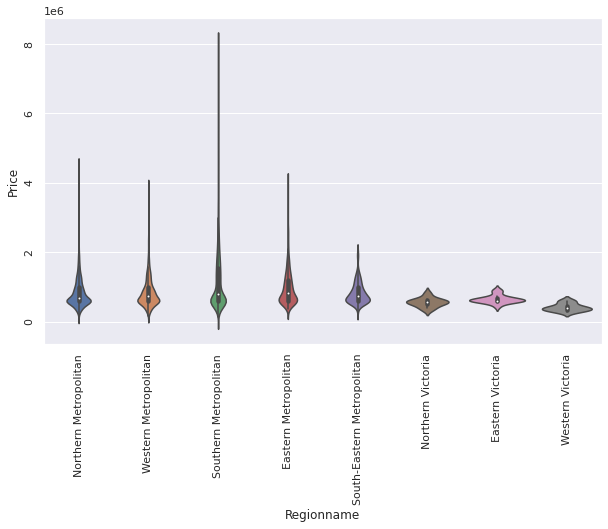

In [ ]:
#Conocer la relacion existente entre la region y el precio
fig, ax=plt.subplots(figsize=(10,6))
sns.violinplot(data=dataframe,x='Regionname',y='Price',ax=ax)
ax.tick_params(labelrotation=90)

Se puede ver que la region influye en el precio porque en cada concentración de datos tiene un valor de precio

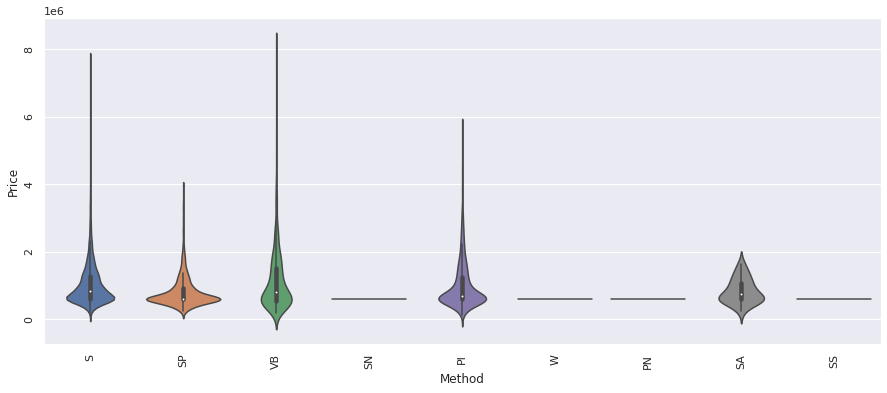

In [ ]:
fig, ax=plt.subplots(figsize=(15,6))
sns.violinplot(data=dataframe,x='Method',y='Price',ax=ax)#Conocer la relacion existente entre El method y el precio
ax.tick_params(labelrotation=90)

Esta variable anterior se podria descartar porque sus concentraciones con respecto a los precios son parecidas

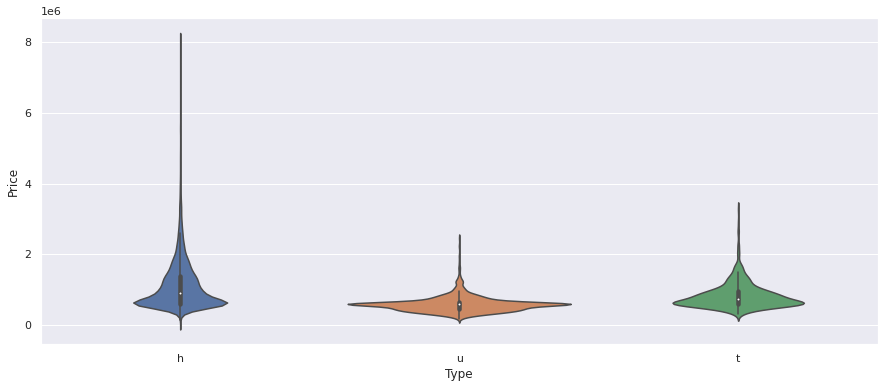

In [ ]:
fig, ax=plt.subplots(figsize=(15,6))
sns.violinplot(data=dataframe,x='Type',y='Price',ax=ax)#Conocer la relacion existente entre El Type y el precio

En la anterior casa se puede ver que el tipo de casa influye en el precio

In [ ]:
dataframe.drop(columns=['Suburb','Address','CouncilArea','Landsize','BuildingArea','Date',
                        'YearBuilt','SellerG','Method'],inplace=True)
dataframe.head()

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Regionname,Propertycount,Age,TotalArea
2,2,h,1035000.0,2.5,2.0,1.0,0.0,-37.8079,144.9934,Northern Metropolitan,4019,116.0,235.0
4,3,h,1465000.0,2.5,3.0,2.0,0.0,-37.8093,144.9944,Northern Metropolitan,4019,117.0,284.0
6,4,h,1600000.0,2.5,3.0,1.0,2.0,-37.8072,144.9941,Northern Metropolitan,4019,2.0,262.0
7,4,h,600000.0,2.5,3.0,2.0,2.0,-37.7965,144.9965,Northern Metropolitan,4019,10.0,620.0
11,3,h,1876000.0,2.5,4.0,2.0,0.0,-37.8024,144.9993,Northern Metropolitan,4019,106.0,455.0


## **Variables Numéricas**

Ahora lo que corresponde hacer con las variables numéricas es hallar la correlación existente entre ellas y asi poder escoger las más correlacionadas  con el precio y al mismo tiempo escoger variables independientes que no estan tan correlacionadas.

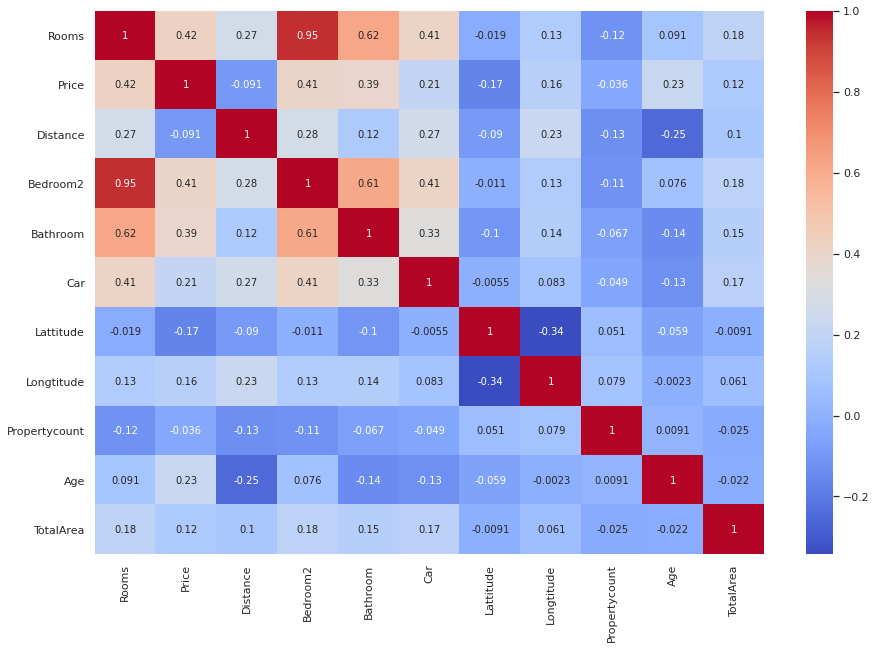

In [ ]:
corr=dataframe.corr()
fig, ax= plt.subplots(figsize=(15,10))#Hallar correlacion entre las variables numericas
sns.heatmap(data=corr,annot=True,cmap='coolwarm')

Del mapa de calor anterior se evidencia que la columna de Bedroom2 esta muy correlacionada con el numero de habitaciones, entonces es mejor eliminarla para evitar las redundancias. Del resto de las caracteristicas con el valor del coeficiente son independientes entre si.

In [ ]:
dataframe.drop(columns=['Bedroom2'], axis='columns', inplace=True)
dataframe.head()

,Rooms,Type,Price,Distance,Bathroom,Car,Lattitude,Longtitude,Regionname,Propertycount,Age,TotalArea
2,2,h,1035000.0,2.5,1.0,0.0,-37.8079,144.9934,Northern Metropolitan,4019,116.0,235.0
4,3,h,1465000.0,2.5,2.0,0.0,-37.8093,144.9944,Northern Metropolitan,4019,117.0,284.0
6,4,h,1600000.0,2.5,1.0,2.0,-37.8072,144.9941,Northern Metropolitan,4019,2.0,262.0
7,4,h,600000.0,2.5,2.0,2.0,-37.7965,144.9965,Northern Metropolitan,4019,10.0,620.0
11,3,h,1876000.0,2.5,2.0,0.0,-37.8024,144.9993,Northern Metropolitan,4019,106.0,455.0


Hay que realizar luego la separación de los datos de train y test porque primero se hara la selección del modelo mediante validacion cruzada de los datos de entrenamiento y despues el mejor modelo se evalua con los datos de test.

In [ ]:
#Separacion de los datos de entrenamiento y test
X=dataframe.drop(columns=['Price'],axis='columns')
y= dataframe[['Price']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
si=SimpleImputer(strategy='most_frequent',missing_values=np.nan)
num_col=X.select_dtypes(exclude='object').columns
cat_col=X.select_dtypes(include='object').columns
ohe=OneHotEncoder(drop='first')
num_transform=Pipeline([('si',si),('ss',StandardScaler())])
cat_transform=Pipeline([('ohe',ohe)])
ct=ColumnTransformer(transformers=[('num',num_transform,num_col),
                                   ('cat',cat_transform,cat_col)])

In [ ]:
X_train.isna().sum()

Rooms              0
Type               0
Distance           0
Bathroom           0
Car                0
Lattitude          5
Longtitude         5
Regionname         0
Propertycount      0
Age              195
TotalArea          0
dtype: int64

## **Modelo Base**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
modelo=Pipeline([('ct',ct),
                 ('lr',LinearRegression())])

In [ ]:
modelo.get_params()

In [ ]:
from sklearn.model_selection import cross_validate
scores=cross_validate(modelo,X_train,y_train,cv=5,scoring='neg_mean_absolute_error',return_train_score=True)

In [ ]:
scores.keys()

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])

In [ ]:
print(f"MAE de Entrenamiento {-1*scores['train_score'].mean()}")
print(f"MAE de Validacion {-1*scores['test_score'].mean()}")

MAE de Entrenamiento 328708.075879539
MAE de Validacion 329995.565077774


Partiendo de que con el modelo de Regresion Lineal se obtiene un error promedio muy alto, y partiendo de que el precio minimo es de 131000 dolares un error aceptable podria ser de 20000 dolares maximo.

## **Gradiente descendente**

Lo que se busca es reducir la funcion de costo la cual es la siguente: 
\begin{eqnarray}
L = \frac{1}{n} \sum_{i=1}^n  (y_i - \hat y_i)^2
\end{eqnarray}
Una de los algoritmos usados es el de Gradiente Descendente, con el cual se va a obtener el mejor modelo aplicando gridsearch 

In [ ]:
from sklearn.linear_model import SGDRegressor
ct2=ColumnTransformer(transformers=[('num',num_transform,num_col),
                                   ('cat',cat_transform,cat_col)])
model2=modelo=Pipeline([('ct',ct2),
                 ('sgd',SGDRegressor())])
model2.get_params()

In [ ]:
from sklearn.model_selection import GridSearchCV
alfas=np.linspace(0.001,1,5)
etas=np.linspace(0.001,1,5)
epsilons=np.linspace(0.001,1,5)
dicc={'sgd__alpha':alfas,'sgd__epsilon':epsilons,'sgd__eta0':etas}
clf=GridSearchCV(estimator=model2,param_grid=dicc,scoring='neg_mean_absolute_error',cv=5,
                 return_train_score=True)

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
print(f'Mejores hiperparametros encontrados {clf.best_params_}')
print(f"Training MAE {-1*clf.cv_results_['mean_train_score'].max()}")
print(f"Validation MAE {-1*clf.cv_results_['mean_test_score'].max()}")

Mejores hiperparametros encontrados {'sgd__alpha': 0.001, 'sgd__epsilon': 0.001, 'sgd__eta0': 0.001}
Training MAE 329437.5518496198
Validation MAE 330573.56918480544


Con estos puntajes se puede ver que son similares al modelo base por lo cual no es un mejor modelo.

## **Utilizando Ridge**

El modelo de Regularización con Ridge para disminuir la funcion de perdida añade un parametro alfa resultando la siguiente ecuacion.
\begin{equation}
L = \frac{1}{n}\sum_{i=1}^n (\hat y_i - y_i)^2 +  \alpha  \frac{1}{2} \sum_{i=1}^m w_i^2
\end{equation}

In [ ]:
from sklearn.linear_model import Ridge
ct3=ColumnTransformer(transformers=[('num',num_transform,num_col),
                                   ('cat',cat_transform,cat_col)])
model3=Pipeline([('ct',ct3),
                 ('rid',Ridge())])
model3.get_params()

In [ ]:
dicc2={'rid__alpha':np.linspace(0,1,10)}
clf3=GridSearchCV(estimator=model3,scoring='neg_mean_absolute_error',cv=5,param_grid=dicc2,return_train_score=True)

In [ ]:
clf3.fit(X_train,y_train)

In [ ]:
print(f'Mejores hiperparametros: {clf3.best_params_}')
print(f"MAE train {-1*clf3.cv_results_['mean_train_score'].max()}")
print(f"MAE test {-1*clf3.cv_results_['mean_test_score'].max()}") 

Mejores hiperparametros: {'rid__alpha': 1.0}
MAE train 328708.075879539
MAE test 329949.6277782195


Usando el modelo Ridge tampoco se obtiene una mejora, por lo que tampoco se usara para la evaluacion.

## **Usando Métodos de ensamble**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
ct4=ColumnTransformer(transformers=[('num',num_transform,num_col),
                                   ('cat',cat_transform,cat_col)])
model4=Pipeline([('ct',ct4),
                 ('rfr',RandomForestRegressor(criterion='mae',n_jobs=-1))])
model4.get_params()

In [ ]:
Dic = {
    "rfr__n_estimators": [10, 100],
    "rfr__max_depth": [10, 50, 100],
    "rfr__max_features": ["auto", "log2"]
}
clf4=GridSearchCV(estimator=model4,param_grid=Dic,scoring='neg_mean_absolute_error',
                  cv=5,return_train_score=True,n_jobs=-1)

In [ ]:
clf4.fit(X_train,y_train)

In [ ]:
print(f'Mejores hiperparametros del metodo de ensamble {clf4.best_params_}')
print(f"MAE train {-1*clf4.cv_results_['mean_train_score'].max()}")
print(f"MAE validation {-1*clf4.cv_results_['mean_test_score'].max()}")

Mejores hiperparametros del metodo de ensamble {'rfr__max_depth': 50, 'rfr__max_features': 'log2', 'rfr__n_estimators': 100}
MAE train 115102.99242246796
MAE validation 299032.1411702554


Se puede evidenciar que con los metodos de ensamble se obtienen mejores puntajes, asi que este será el modelo para realizar la evaluación.

In [ ]:
best_model=clf4.best_estimator_
best_model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
         steps=[('ct',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('si',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='most_frequent',
                                                                     

In [ ]:
from sklearn import metrics
y_pred_train=best_model.predict(X_train)
y_pred_test=best_model.predict(X_test)
print(f'MAE train {metrics.mean_absolute_error(y_train,y_pred_train)}')
print(f'MAE test {metrics.mean_absolute_error(y_test,y_pred_test)}')

MAE train 122908.89769125683
MAE test 309833.3654346837


Efectivamente el modelo creado por los metodos de ensamble resulto teniendo una varianza muy alta porque el error obtenido con los datos de test es demasiado alto comparado con el train. Aun asi en el error obtenido durante el test es menor en comparacion con los modelos de regresion, Ridge y SGD. 